<h1>Notbook do analizy wyników algorytmu mrówkowego dla 1500 próbek po od 4-15 miast wykonanych dla różnych wartości warametru RHO z przedziału 0.1 - 0.9</h1>

1. Import bibliotek

In [56]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from builders.PathBuilder import PathBuilder
from constants.AlgNamesResults.names import *
from os.path import exists
import seaborn as sns
%matplotlib inline

2. Przygotowanie fuknkcjie i zmiennych do ekstrakcji danych z plików CSV

In [73]:
MEASUREMENTS = "measurements"
NAME_DIR_WITH_RESULTS_CSV = "aco_test_range_rho"
CSV = "csv"
CPU = "CPU"
TIME_AND_DATA = "TIME_AND_DATA"
TIME_AND_MEMORY = "TIME_AND_MEMORY"

def generate_combinations(type_of_measure):
    CONFIGURATIONS = list()
    pattern_suffix = "%s_POP_%d_ALFA_%s_BETA_%s_RHO_%s_MAX_ITER_%d"
    size_population_range = 100
    alpha = 1
    beta= 2
    rho_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    number_of_iterations_range = 20
    for rho in rho_range:
        alpha_str = str(alpha).replace(".", "_")
        beta_str = str(beta).replace(".", "_")
        rho_str = str(rho).replace(".", "_")
        content = pattern_suffix % (type_of_measure, size_population_range, alpha_str, beta_str, rho_str, number_of_iterations_range)
        CONFIGURATIONS.append(content)
    return CONFIGURATIONS

def get_file_name(type_measure, alpha_prop, beta_prop):
    pattern_suffix = "%s_PSO_POP_%d_ALPHA_%s_BETA_%s_NR_ITER_%d"
    alpha_str = str(alpha_prop).replace(".", "_")
    beta_str = str(beta_prop).replace(".", "_")
    return pattern_suffix % (type_measure, 100, alpha_str, beta_str, 100)

def prepare_csv_data_dictionary(type_of_measure, name_of_dir_with_meassurements):
    resutl_dictionary = dict()
    names = list()
    for name_of_csv_file in generate_combinations(type_of_measure):
        path_to_csv = PathBuilder()\
            .add_dir(MEASUREMENTS)\
            .add_dir(name_of_dir_with_meassurements)\
            .add_file(name_of_csv_file, "csv")\
            .build()
        if exists(path_to_csv):
            names.append(name_of_csv_file)
            resutl_dictionary[name_of_csv_file] = pd.read_csv(path_to_csv)
            resutl_dictionary[name_of_csv_file].dropna(axis=1, inplace=True)
            resutl_dictionary[name_of_csv_file].replace("Nan", "", inplace=True)
    return resutl_dictionary, names

csv_results_dict, names = prepare_csv_data_dictionary(TIME_AND_DATA, NAME_DIR_WITH_RESULTS_CSV)

3. Prezentacja danych z przykładowego pliku CSV

In [92]:
df = csv_results_dict["TIME_AND_DATA_POP_100_ALFA_1_BETA_2_RHO_0_1_MAX_ITER_20"]
df

,number_of_cities,index_of_sample,name_of_src_file,type_of_measurement,used_algorithm,full_cost,hamiltonian_cycle_cost,best_way,best_way_is_optimal,absolute_distance_error,...,min_utilization_of_cpu,avg_utilization_of_cpu,std_utilization_of_cpu,max_utilization_of_cpu,time_duration_is_sec,used_memory_before_measurement_in_bytes,used_memory_peak_before_measurement_in_bytes,used_memory_after_measurement_in_bytes,used_memory_peak_after_measurement_in_bytes,used_memory_diff_before_after_measurement_in_bytes
0,4,0,TSP_CITIES_SET_0_N_4.json,TIME_AND_DATA,ant_colony_tsp_scikit_opt,1185.006870,1935.208176,"[0, 3, 2, 1, 0] ...",True,0.000000,...,nan,nan,nan,nan,0.400479,nan,nan,nan,nan,nan ...
1,4,1,TSP_CITIES_SET_1_N_4.json,TIME_AND_DATA,ant_colony_tsp_scikit_opt,2045.854127,3261.754206,"[0, 2, 1, 3, 0] ...",False,411.790002,...,nan,nan,nan,nan,0.322640,nan,nan,nan,nan,nan ...
2,4,2,TSP_CITIES_SET_2_N_4.json,TIME_AND_DATA,ant_colony_tsp_scikit_opt,1743.860953,2684.775933,"[0, 3, 2, 1, 0] ...",False,11.992011,...,nan,nan,nan,nan,0.329006,nan,nan,nan,nan,nan ...
3,4,3,TSP_CITIES_SET_3_N_4.json,TIME_AND_DATA,ant_colony_tsp_scikit_opt,1394.842023,2088.938558,"[0, 1, 2, 3, 0] ...",True,0.000000,...,nan,nan,nan,nan,0.328244,nan,nan,nan,nan,nan ...
4,4,4,TSP_CITIES_SET_4_N_4.json,TIME_AND_DATA,ant_colony_tsp_scikit_opt,1085.864557,2138.469421,"[0, 1, 2, 3, 0] ...",True,0.000000,...,nan,nan,nan,nan,0.308835,nan,nan,nan,nan,nan ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,15,95,TSP_CITIES_SET_95_N_15.json,TIME_AND_DATA,ant_colony_tsp_scikit_opt,5449.444599,6164.850078,"[0, 4, 10, 12, 7, 3, 2, 8, 13, 9, 1, 11, 14, 5...",False,43.914648,...,nan,nan,nan,nan,1.586132,nan,nan,nan,nan,nan ...
1196,15,96,TSP_CITIES_SET_96_N_15.json,TIME_AND_DATA,ant_colony_tsp_scikit_opt,5179.269221,6244.234948,"[0, 4, 7, 12, 5, 3, 14, 11, 6, 1, 10, 8, 2, 9,...",False,523.542623,...,nan,nan,nan,nan,1.535065,nan,nan,nan,nan,nan ...
1197,15,97,TSP_CITIES_SET_97_N_15.json,TIME_AND_DATA,ant_colony_tsp_scikit_opt,6477.392664,7589.698827,"[0, 11, 4, 6, 9, 12, 3, 7, 2, 8, 14, 10, 13, 5...",False,623.365234,...,nan,nan,nan,nan,1.644390,nan,nan,nan,nan,nan ...
1198,15,98,TSP_CITIES_SET_98_N_15.json,TIME_AND_DATA,ant_colony_tsp_scikit_opt,5327.535874,5761.155523,"[0, 12, 2, 14, 3, 8, 1, 11, 5, 10, 13, 9, 7, 4...",False,59.634444,...,nan,nan,nan,nan,1.535972,nan,nan,nan,nan,nan ...


3. Opracowanie funkcji do zliczania danych

In [36]:
def generate_data_frame_for_realtive_distance_error_for_samples(csv_results_dict):
    # [NUMBER_OF_CITIES][4]-[15]
    # [0][RELATIVE_DISTANCE_ERROR]
    # .
    # [99]
    names = csv_results_dict.keys()
    TABLE = dict()
    rho_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    index = 0
    number_of_cities = [4,5,6,7,8,9,10,11,12,13,14,15]
    for name in names:
        df = csv_results_dict[name]
        df = df[["number_of_cities", "index_of_sample", "relative_distance_error"]]
        tmp_dict = dict()
        for nr_cities in number_of_cities:
            condition = df[(df['number_of_cities'] == nr_cities)]
            values = condition[["relative_distance_error"]].values
            tmp_dict[nr_cities] = list(values.flatten())
        rho = rho_range[index]
        TABLE_RELATIVE[rho] = tmp_dict
        index += 1
    return TABLE

def generate_data_fram_with_stats(csv_results_dict, stat):
    # [NUMBER_OF_CITIES][4]-[15]
    # [0][MIN_RELATIVE_DISTANCE_ERROR]
    # .
    # [99]
    names = csv_results_dict.keys()
    TABLE = dict()
    rho_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    number_of_cities = [4,5,6,7,8,9,10,11,12,13,14,15]
    index = 0
    rho = rho_range[index] 
    for name in names:
        df = csv_results_dict[name]
        rho = rho_range[index]
        for nr_cities in number_of_cities:
            condition = df[(df['number_of_cities'] == nr_cities)]
            series = condition["relative_distance_error"]
            value = 0.0
            if stat == "min":
                value = series.min()
            elif stat == "avg":
                value = series.mean()
            elif stat == "max":
                value = series.max()
            elif stat == "stdev":
                value = series.std()
            if nr_cities not in TABLE:
                TABLE[nr_cities] = list()
                TABLE[nr_cities].append(value)
            else:
                TABLE[nr_cities].append(value)
    return TABLE
        

4. Przygotowanie mapy ciepła dla danej wartości parametru RHO i danej liczby miast obrazującej średnią wartość błędu względnego otrzymanych rozwiązań

Text(0.0, 1.0, 'ŚREDNIA WARTOŚĆ BŁĘDU WZGLĘDNEGO DLA DANEJ LICZBY MIAST ORAZ WARTOŚCI PARAMETRU RHO DLA ALGORYTMU ACO')

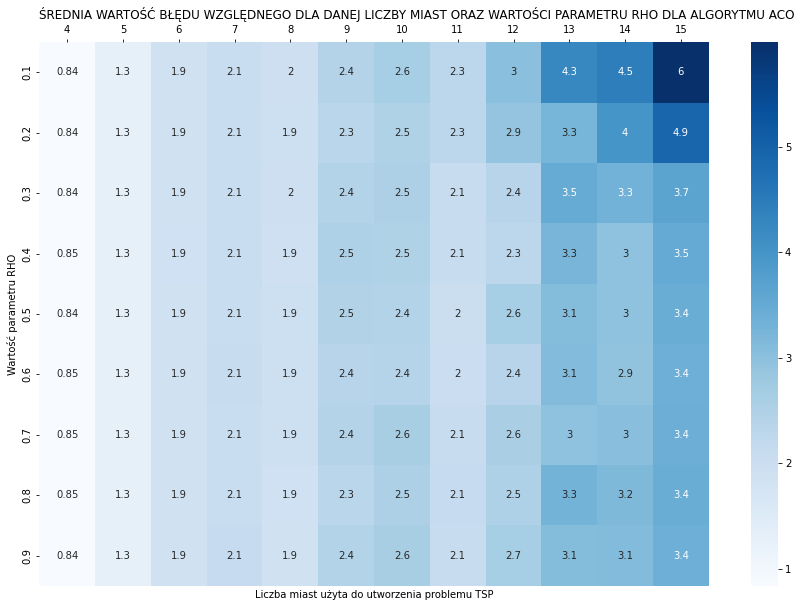

In [17]:
f = generate_data_fram_with_stats(csv_results_dict, "avg")
f2 = pd.DataFrame.from_dict(f)
f2.set_index(pd.Series([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(f2, cmap="Blues", annot=True, ax=ax)
ax.xaxis.tick_top()
xticks_labels = [4,5,6,7,8,9,10,11,12,13,14,15]
yticks_labels = ["0.1", "0.2","0.3","0.4","0.5", "0.6", "0.7", "0.8", "0.9"]
plt.xticks(np.arange(len(xticks_labels)) + .5, labels=xticks_labels)
plt.yticks(np.arange(len(yticks_labels)) + .5, labels=yticks_labels)
# axis labels
plt.xlabel('Liczba miast użyta do utworzenia problemu TSP')
plt.ylabel('Wartość parametru RHO')

# title
title = 'Średnia wartość błędu względnego dla danej liczby miast oraz wartości parametru RHO dla algorytmu ACO'.upper()
plt.title(title, loc='left')

5. Przygotowanie mapy ciepła dla danej wartości parametru RHO i danej liczby miast obrazującej maksymalną wartość błędu względnego otrzymanych rozwiązań

Text(0.0, 1.0, 'MAKSYMALNA WARTOŚĆ BŁĘDU WZGLĘDNEGO DLA DANEJ LICZBY MIAST ORAZ WARTOŚCI PARAMETRU RHO DLA ALGORYTMU ACO')

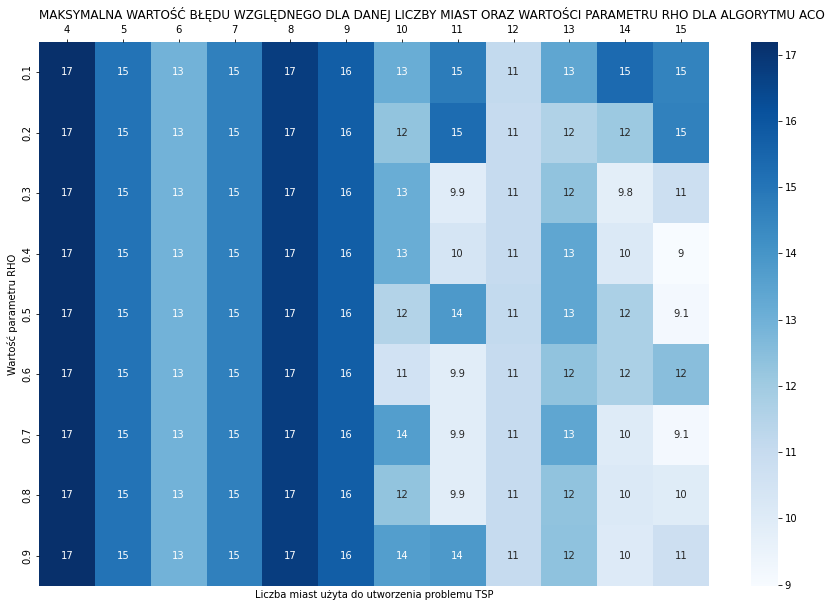

In [21]:
f = generate_data_fram_with_stats(csv_results_dict, "max")
f2 = pd.DataFrame.from_dict(f)
f2.set_index(pd.Series([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(f2, cmap="Blues", annot=True, ax=ax)
ax.xaxis.tick_top()
xticks_labels = [4,5,6,7,8,9,10,11,12,13,14,15]
yticks_labels = ["0.1", "0.2","0.3","0.4","0.5", "0.6", "0.7", "0.8", "0.9"]
plt.xticks(np.arange(len(xticks_labels)) + .5, labels=xticks_labels)
plt.yticks(np.arange(len(yticks_labels)) + .5, labels=yticks_labels)
# axis labels
plt.xlabel('Liczba miast użyta do utworzenia problemu TSP')
plt.ylabel('Wartość parametru RHO')
# title
title = 'Maksymalna wartość błędu względnego dla danej liczby miast oraz wartości parametru RHO dla algorytmu ACO'.upper()
plt.title(title, loc='left')

6. Przygotowanie mapy ciepła dla danej wartości parametru RHO i danej liczby miast obrazującej wartość odchylenia standardowego błędu względnego otrzymanych rozwiązań

Text(0.0, 1.0, 'ODCHYLENIE STANDARDOWE WARTOŚCI BŁĘDU WZGLĘDNEGO DLA DANEJ LICZBY MIAST ORAZ WARTOŚCI PARAMETRU RHO DLA ALGORYTMU ACO')

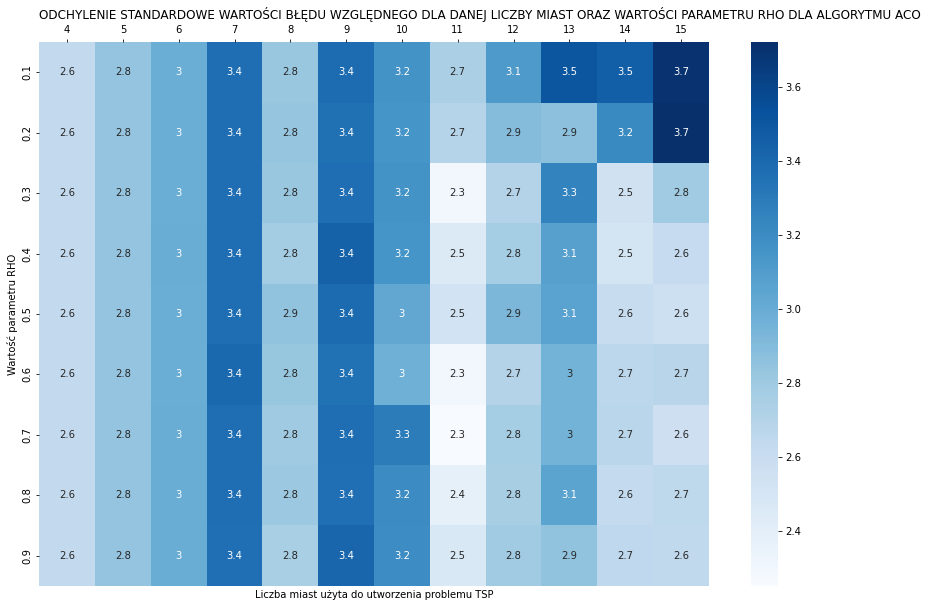

In [23]:
f = generate_data_fram_with_stats(csv_results_dict, "stdev")
f2 = pd.DataFrame.from_dict(f)
f2.set_index(pd.Series([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(f2, cmap="Blues", annot=True, ax=ax)
ax.xaxis.tick_top()
xticks_labels = [4,5,6,7,8,9,10,11,12,13,14,15]
yticks_labels = ["0.1", "0.2","0.3","0.4","0.5", "0.6", "0.7", "0.8", "0.9"]
plt.xticks(np.arange(len(xticks_labels)) + .5, labels=xticks_labels)
plt.yticks(np.arange(len(yticks_labels)) + .5, labels=yticks_labels)
# axis labels
plt.xlabel('Liczba miast użyta do utworzenia problemu TSP')
plt.ylabel('Wartość parametru RHO')

# title
title = 'Odchylenie standardowe wartości błędu względnego dla danej liczby miast oraz wartości parametru RHO dla algorytmu ACO'.upper()
plt.title(title, loc='left')

In [93]:
def generate_data_fram_with_optimal_or_not(csv_results_dict, stat):
    # [NUMBER_OF_CITIES][4]-[15]
    # [0][MIN_RELATIVE_DISTANCE_ERROR]
    # .
    # [99]
    names = csv_results_dict.keys()
    TABLE = dict()
    rho_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    number_of_cities = [4,5,6,7,8,9,10,11,12,13,14,15]
    index = 0
    rho = rho_range[index] 
    for name in names:
        df = csv_results_dict[name]
        rho = rho_range[index]
        for nr_cities in number_of_cities:
            condition = df[(df['number_of_cities'] == nr_cities)]
            series = condition["best_way_is_optimal"]
            true_false_percentage = series.value_counts(normalize=True, ascending = True)
            value = 0.0
            if stat == "optimal_to_all_percentage":
                value = true_false_percentage[0]
            elif stat == "not_optimal_to_all_percentage":
                value = true_false_percentage[1]
            if nr_cities not in TABLE:
                TABLE[nr_cities] = list()
                TABLE[nr_cities].append(value)
            else:
                TABLE[nr_cities].append(value)
    return TABLE

Text(0.0, 1.0, 'PROCENT UZYSKANIA OPTYMALNYCH ROZWIĄZAŃ DLA DANEJ LICZBY MIAST ORAZ WARTOŚCI PARAMETRU RHO DLA ALGORYTMU ACO')

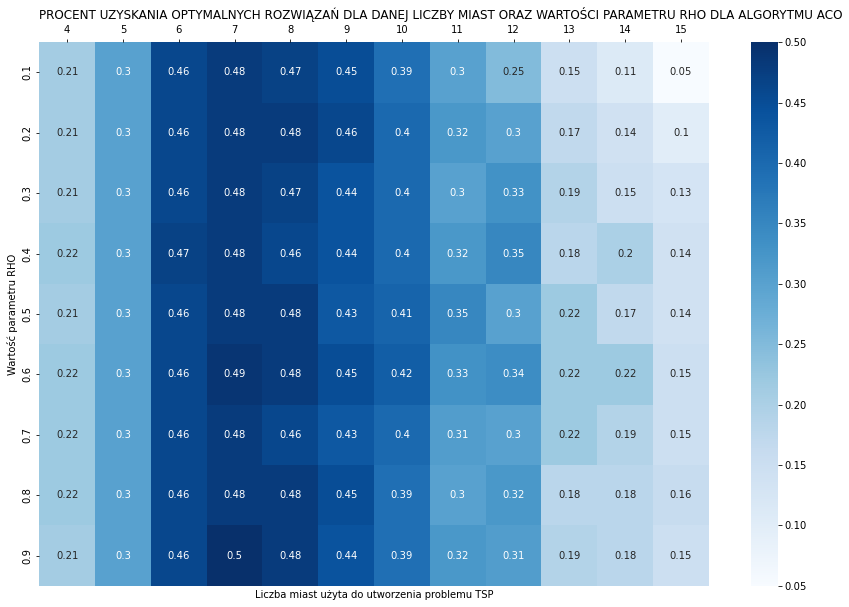

In [96]:
f = generate_data_fram_with_optimal_or_not(csv_results_dict, "optimal_to_all_percentage")
f2 = pd.DataFrame.from_dict(f)
f2.set_index(pd.Series([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(f2, cmap="Blues", annot=True, ax=ax)
ax.xaxis.tick_top()
xticks_labels = [4,5,6,7,8,9,10,11,12,13,14,15]
yticks_labels = ["0.1", "0.2","0.3","0.4","0.5", "0.6", "0.7", "0.8", "0.9"]
plt.xticks(np.arange(len(xticks_labels)) + .5, labels=xticks_labels)
plt.yticks(np.arange(len(yticks_labels)) + .5, labels=yticks_labels)
# axis labels
plt.xlabel('Liczba miast użyta do utworzenia problemu TSP')
plt.ylabel('Wartość parametru RHO')
# title
title = 'Procent uzyskania optymalnych rozwiązań dla danej liczby miast oraz wartości parametru RHO dla algorytmu ACO'.upper()
plt.title(title, loc='left')

Text(0.0, 1.0, 'PROCENT UZYSKANIA BŁĘDNYCH ROZWIĄZAŃ DLA DANEJ LICZBY MIAST ORAZ WARTOŚCI PARAMETRU RHO DLA ALGORYTMU ACO')

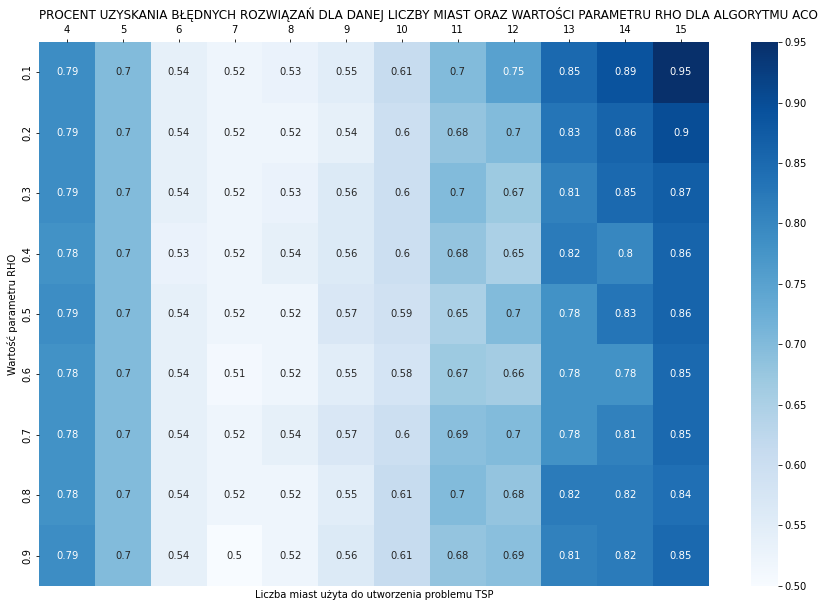

In [97]:
f = generate_data_fram_with_optimal_or_not(csv_results_dict, "not_optimal_to_all_percentage")
f2 = pd.DataFrame.from_dict(f)
f2.set_index(pd.Series([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(f2, cmap="Blues", annot=True, ax=ax)
ax.xaxis.tick_top()
xticks_labels = [4,5,6,7,8,9,10,11,12,13,14,15]
yticks_labels = ["0.1", "0.2","0.3","0.4","0.5", "0.6", "0.7", "0.8", "0.9"]
plt.xticks(np.arange(len(xticks_labels)) + .5, labels=xticks_labels)
plt.yticks(np.arange(len(yticks_labels)) + .5, labels=yticks_labels)
# axis labels
plt.xlabel('Liczba miast użyta do utworzenia problemu TSP')
plt.ylabel('Wartość parametru RHO')
# title
title = 'Procent uzyskania błędnych rozwiązań dla danej liczby miast oraz wartości parametru RHO dla algorytmu ACO'.upper()
plt.title(title, loc='left')